##Import Libararies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
##Loading the dataset to a Pandas Dataframe
df=pd.read_csv('/content/creditcard.csv')

In [3]:
##First 5 rows of the Dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
19893,30631,-0.377215,0.973528,1.647077,0.732439,0.024728,-0.541379,0.828488,-0.060740,-0.725148,-0.450153,0.242824,0.488841,0.559073,0.137418,0.863233,-0.415339,-0.029005,-0.602882,-0.904378,-0.035009,0.228443,0.685913,-0.107687,0.631740,0.126366,-0.327633,0.056522,0.033139,29.90,0.0
19894,30631,1.209281,0.078793,0.061820,0.593730,-0.235772,-0.448524,-0.141196,0.089236,0.411825,-0.263041,-0.572076,-1.062719,-2.106307,0.195707,1.634883,0.404446,0.278583,-0.336045,-0.409635,-0.224263,-0.302369,-0.984051,0.130401,-0.390756,0.105615,0.152881,-0.025292,0.021130,16.00,0.0
19895,30632,1.286596,-1.450336,0.814530,-1.308949,-2.055209,-0.592064,-1.317286,0.032386,-1.720017,1.589335,1.187759,-0.705883,-0.567504,-0.062561,0.250012,0.047145,0.259016,0.881106,-0.247161,-0.219582,0.040743,0.262534,-0.045112,0.515660,0.218606,-0.138794,0.026395,0.030885,92.00,0.0
19896,30633,-0.488090,1.018448,0.670593,-0.245462,0.828347,-0.233102,0.662586,-0.040028,-0.279439,-0.402822,-1.387400,-0.332092,0.764095,-0.630524,0.970633,0.765937,-0.533608,0.267265,0.450661,0.145257,-0.344859,-0.902035,-0.050171,-1.060827,0.062221,0.150428,0.130266,0.067290,1.99,0.0
19897,30633,-2.609841,2.479357,0.763844,0.044509,-0.645716,0.762867,-1.626415,-7.617854,1.399746,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
##Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19898 entries, 0 to 19897
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    19898 non-null  int64  
 1   V1      19898 non-null  float64
 2   V2      19898 non-null  float64
 3   V3      19898 non-null  float64
 4   V4      19898 non-null  float64
 5   V5      19898 non-null  float64
 6   V6      19898 non-null  float64
 7   V7      19898 non-null  float64
 8   V8      19898 non-null  float64
 9   V9      19898 non-null  float64
 10  V10     19898 non-null  float64
 11  V11     19897 non-null  float64
 12  V12     19897 non-null  float64
 13  V13     19897 non-null  float64
 14  V14     19897 non-null  float64
 15  V15     19897 non-null  float64
 16  V16     19897 non-null  float64
 17  V17     19897 non-null  float64
 18  V18     19897 non-null  float64
 19  V19     19897 non-null  float64
 20  V20     19897 non-null  float64
 21  V21     19897 non-null  float64
 22

In [6]:
##Checking the number of missing values in each columns
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [7]:
##Disturbution of legit transaction & fraudulent transactions
df['Class'].value_counts()

0.0    19812
1.0       85
Name: Class, dtype: int64

This dataset is highly unbalance

0--> Normal transaction
1--> Fraudulent transaction



In [8]:
#Separating the data for analysis
legit = df[df["Class"] == 0]
fraud = df[df["Class"] == 1]

print(f'Legit: {fraud.Class.value_counts()[1]} & Fraud : {legit.Class.value_counts()[0]}')

Legit: 85 & Fraud : 19812


In [9]:
print(legit.shape)
print(fraud.shape)

(19812, 31)
(85, 31)


In [10]:
#Statistical measures of the data
legit.Amount.describe()

count    19812.000000
mean        70.169855
std        205.091118
min          0.000000
25%          5.900000
50%         16.070000
75%         59.950000
max       7879.420000
Name: Amount, dtype: float64

In [11]:
fraud.Amount.describe()

count      85.000000
mean       93.869647
std       261.736641
min         0.000000
25%         1.000000
50%         1.000000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [12]:
#Compare the values for transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,15483.312841,-0.207233,0.215159,0.803126,0.250998,-0.137392,0.104262,-0.108931,0.003328,0.652123,-0.190219,0.659685,-1.054588,0.683299,0.596339,-0.043684,0.016669,0.325518,-0.033251,-0.067476,0.036041,-0.050458,-0.145393,-0.036602,0.011905,0.121909,0.032495,0.010624,0.006940,70.169855
1.0,17436.164706,-8.862174,6.570214,-12.622087,6.343007,-6.187820,-2.567646,-8.600077,4.519437,-3.041592,-7.284235,6.052295,-9.070368,0.418066,-8.814590,-0.171201,-5.041641,-8.024561,-2.820745,0.318733,0.725080,0.536833,-0.395312,-0.385599,-0.275306,0.359543,0.180456,0.907255,0.093985,93.869647


##EDA

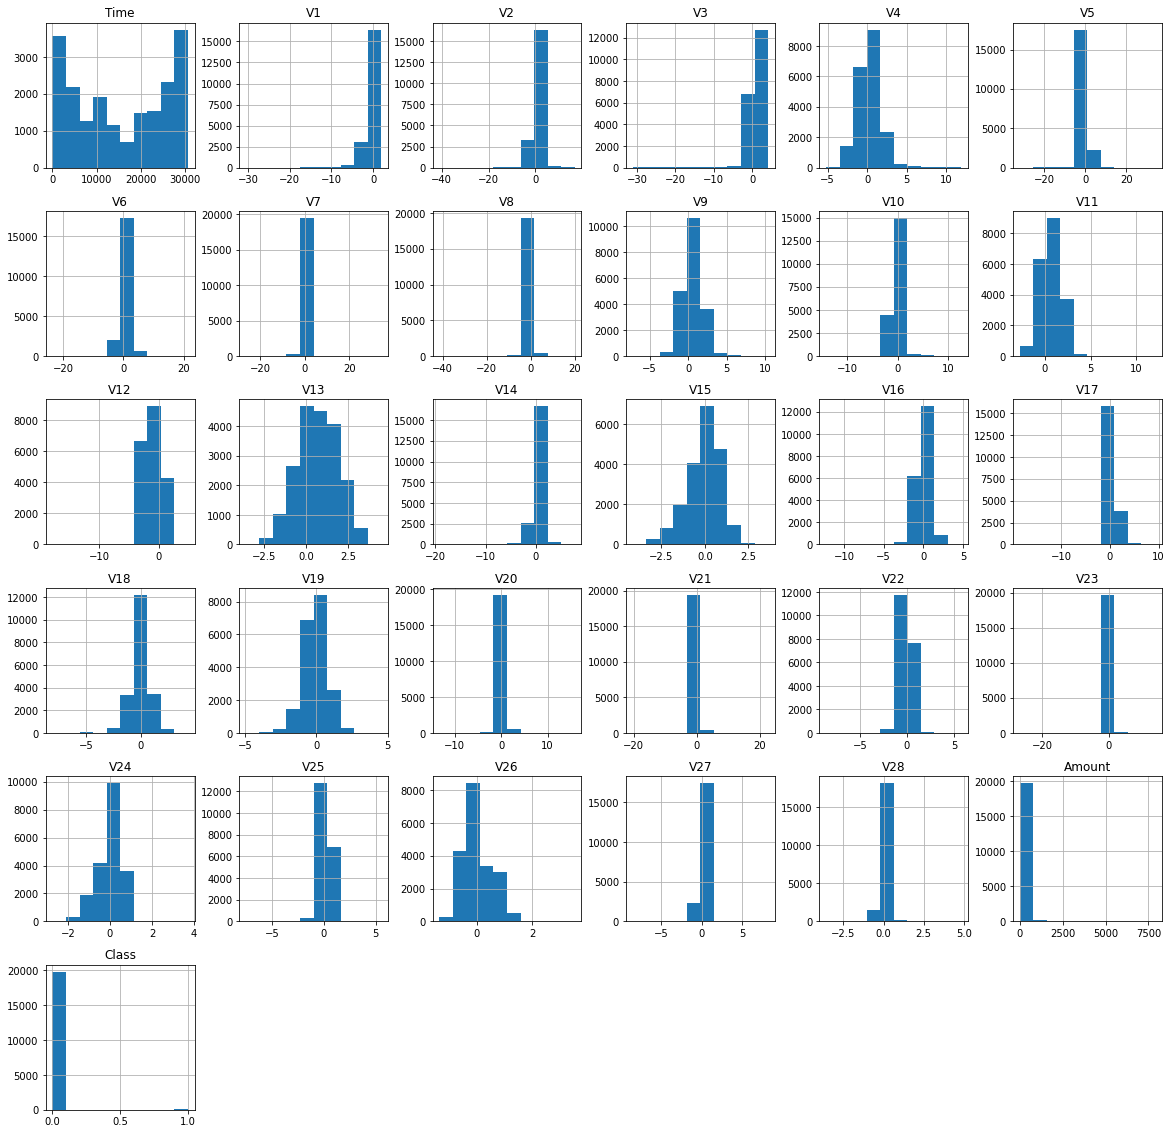

In [50]:
#Plot histgram of each parameter
df.hist(figsize=(20,20))
plt.show()

<Figure size 1152x576 with 0 Axes>

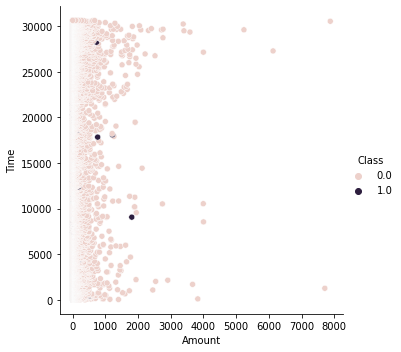

In [60]:
#Scattered plot
plt.figure(figsize=(16,8))
sns.relplot(x='Amount',y="Time",hue="Class",data=df)

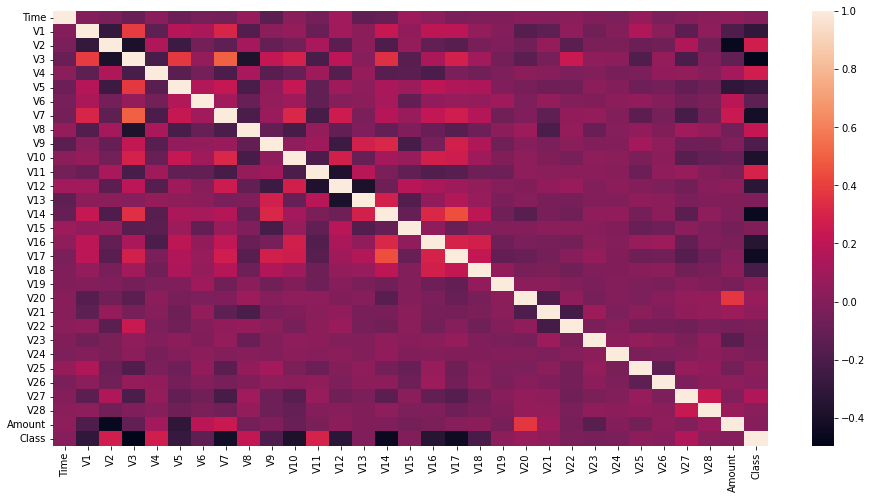

In [59]:
#Correlation metric
plt.figure(figsize=(16,8))
sns.heatmap(df.corr())
plt.show()

Under-Sampling

Build a sample dataset containing similar disturbation of normal transaction and fraudulent transaction

Number of fraudulent transaction -->244

In [13]:
legit_sample=legit.sample(n=244)

##Concatenating two DataFrame

In [14]:
df2=pd.concat([legit_sample,fraud],axis=0)

In [15]:
df2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
14411,25551,1.144713,-0.210810,0.566154,-0.204525,-0.576987,-0.226768,-0.352931,0.112449,0.131485,-0.100025,1.690073,0.989675,0.013475,0.364321,0.807769,0.314359,-0.334630,-0.365038,-0.048596,-0.032263,-0.038410,-0.161180,0.089739,0.068792,0.004017,0.914509,-0.063225,0.000411,29.35,0.0
15158,26511,1.314821,0.273788,-0.062333,0.504077,-0.034281,-0.611846,0.014323,-0.104407,0.211719,-0.257839,-0.954087,-0.469515,-0.430691,-0.177931,1.243515,0.761079,-0.264564,0.073329,0.123454,-0.105032,-0.352044,-1.050356,0.035210,-0.517692,0.300950,0.149172,-0.029428,0.020583,1.79,0.0
9454,13974,1.272022,0.366876,0.098190,0.582229,0.158351,-0.210551,-0.140428,-0.068637,1.153754,-0.477208,1.764012,-1.998774,1.689119,1.340980,-0.253525,0.910047,0.175517,0.782595,0.215052,-0.095013,-0.444510,-1.084581,0.022179,-0.642958,0.269182,0.092583,-0.056865,0.005397,4.49,0.0
17876,28997,-1.051667,0.386944,2.361947,-1.027226,-0.506955,-0.551243,0.086068,0.117761,0.682343,-0.831397,-0.844075,0.264835,0.107226,-0.704069,-0.398849,0.342717,-0.382579,-0.351543,-0.441786,0.008416,-0.085001,-0.035301,-0.184826,0.469231,-0.106516,0.838362,0.163958,0.138774,24.00,0.0
4426,3768,1.435760,-0.626975,-0.895127,-1.630803,1.475838,3.268337,-1.194016,0.714978,0.362206,0.290312,1.009265,-3.174072,1.866000,1.408498,0.257616,1.531257,0.445538,-0.869482,0.772272,0.185782,-0.288903,-0.888858,0.096944,0.919107,0.363570,-0.506482,-0.016565,0.012339,24.15,0.0


In [16]:
df2.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
17480,28755,-30.552380,16.713389,-31.103685,6.534984,-22.105532,-4.977692,-20.371514,20.007208,-3.565738,-7.731071,3.829427,-5.314332,1.446930,-4.579264,-0.142299,-4.997848,-10.961410,-4.641482,0.567056,1.733644,1.816520,-2.288686,-1.460544,0.183179,2.208209,-0.208824,1.232636,0.356660,99.99,1.0
18466,29526,1.102804,2.829168,-3.932870,4.707691,2.937967,-1.800904,1.672734,-0.300240,-2.783011,-1.884842,3.792565,-1.460471,-1.312776,-7.077361,-0.299466,2.493228,6.244987,2.971749,-2.679950,-0.030880,-0.106994,-0.250050,-0.521627,-0.448950,1.291646,0.516327,0.009146,0.153318,0.68,1.0
18472,29531,-1.060676,2.608579,-2.971679,4.360089,3.738853,-2.728395,1.987616,-0.357345,-2.757535,-2.335933,2.111517,-2.591950,-1.950589,-7.311580,0.077753,2.290608,6.509272,2.569971,-3.286150,-0.089062,-0.063168,-0.207385,-0.183261,-0.103679,0.896178,0.407387,-0.130918,0.192177,0.68,1.0
18773,29753,0.269614,3.549755,-5.810353,5.809370,1.538808,-2.269219,-0.824203,0.351070,-3.759059,-4.592390,5.479392,-5.657858,-2.648076,-10.384890,-0.225946,-0.701883,0.409736,0.939604,-1.954300,0.310525,0.371121,-0.322290,-0.549856,-0.520629,1.378210,0.564714,0.553255,0.402400,0.68,1.0
18809,29785,0.923764,0.344048,-2.880004,1.721680,-3.019565,-0.639736,-3.801325,1.299096,0.864065,-2.895252,3.028162,-2.549177,-1.560432,-2.971317,1.078895,-4.702012,-4.908099,-1.508873,3.001685,0.170872,0.899931,1.481271,0.725266,0.176960,-1.815638,-0.536517,0.489035,-0.049729,30.30,1.0


In [17]:
df2['Class'].value_counts()

0.0    244
1.0     85
Name: Class, dtype: int64

In [18]:
df2.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,14809.532787,-0.068377,0.117261,0.688651,0.150168,-0.04474,0.110587,-0.090075,-0.038675,0.562527,-0.179190,0.645243,-1.091136,0.720327,0.653158,-0.027589,0.050602,0.374477,-0.088834,0.008082,0.053519,-0.008684,-0.185779,-0.022746,-0.035208,0.139696,0.006163,-0.013584,-0.010347,71.252869
1.0,17436.164706,-8.862174,6.570214,-12.622087,6.343007,-6.18782,-2.567646,-8.600077,4.519437,-3.041592,-7.284235,6.052295,-9.070368,0.418066,-8.814590,-0.171201,-5.041641,-8.024561,-2.820745,0.318733,0.725080,0.536833,-0.395312,-0.385599,-0.275306,0.359543,0.180456,0.907255,0.093985,93.869647


##Splitting the data into features & Targets 

In [19]:
X=df2.drop(columns='Class',axis=1)
Y=df2['Class']

In [20]:
print(X)

        Time         V1         V2  ...       V27       V28  Amount
14411  25551   1.144713  -0.210810  ... -0.063225  0.000411   29.35
15158  26511   1.314821   0.273788  ... -0.029428  0.020583    1.79
9454   13974   1.272022   0.366876  ... -0.056865  0.005397    4.49
17876  28997  -1.051667   0.386944  ...  0.163958  0.138774   24.00
4426    3768   1.435760  -0.626975  ... -0.016565  0.012339   24.15
...      ...        ...        ...  ...       ...       ...     ...
17480  28755 -30.552380  16.713389  ...  1.232636  0.356660   99.99
18466  29526   1.102804   2.829168  ...  0.009146  0.153318    0.68
18472  29531  -1.060676   2.608579  ... -0.130918  0.192177    0.68
18773  29753   0.269614   3.549755  ...  0.553255  0.402400    0.68
18809  29785   0.923764   0.344048  ...  0.489035 -0.049729   30.30

[329 rows x 30 columns]


In [21]:
print(Y)

14411    0.0
15158    0.0
9454     0.0
17876    0.0
4426     0.0
        ... 
17480    1.0
18466    1.0
18472    1.0
18773    1.0
18809    1.0
Name: Class, Length: 329, dtype: float64


#Split the data into Training and testing data

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2,stratify=Y, random_state=2)

In [27]:
print(X.shape,X_train.shape,X_test.shape)

(329, 30) (263, 30) (66, 30)


##Logistic Regession

In [28]:
model=LogisticRegression()

In [29]:
##Training the logistic Regression Model with training data
model.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

##Model Evaluation

In [35]:
##Accuracy on training data
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [36]:
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.9961977186311787


In [37]:
##Accuracy on test data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [39]:
print('Accuracy on test data:',test_data_accuracy)

Accuracy on test data: 0.9696969696969697
